In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Part 1 - Prepare SQLAlchemy 

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# Preview the data model in Db Browser or a similar tool
# (do this to get a sense as to how the database is structured)

# Part 2 - Exploratory Climate Analysis

Text(0, 0.5, 'Inches')

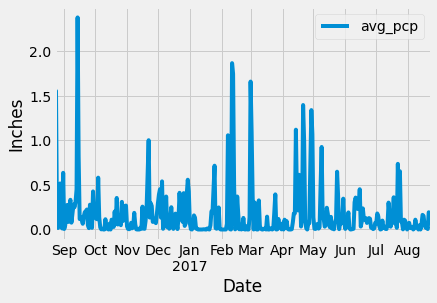

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
query = f'''
Select
date,
AVG(prcp) as avg_pcp
from 
    measurement
where
    date >= (SELECT DATE(MAX(date),'-1 year')FROM  measurement)
GROUP BY
    date
ORDER BY
    date
    
'''

# Save the query results as a Pandas DataFrame and set the index to the date column
percipitation_df = pd.read_sql(query, conn)
percipitation_df['date'] = pd.to_datetime(percipitation_df['date'])

# Sort the dataframe by date
percipitation_df.sort_values('date')
percipitation_df = percipitation_df.set_index('date')
percipitation_df


# Use Pandas Plotting with Matplotlib to plot the data
percipitation_df.plot()
plt.xlabel('Date')
plt.ylabel('Inches')

In [53]:
# Use Pandas to calculate the summary statistics for the precipitation data
percipitation_df.describe()

,avg_pcp
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [57]:
# Design a query to show how many stations are available in this dataset?
query = '''
SELECT 
COUNT(*) AS station_count
FROM 
    station

'''
station_df = pd.read_sql(query, conn)
station_count = station_df['station_count'].values[0]
print(f'There are {station_count} stations in the database.')


There are 9 stations in the database.


In [59]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
query = '''
SELECT
s.station AS station_code,
s.name AS station_name,
Count(*) AS station_count
FROM
measurement m 
INNER JOIN station s
ON m.station = s.station
GROUP BY
s.name
ORDER BY
station_count DESC
'''
active_stations_df = pd.read_sql(query, conn)
active_stations_df.head()

,station_code,station_name,station_count
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612


In [67]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station = active_stations_df['station_code'].values[0]

query = f'''
SELECT
MIN(tobs) AS min_tobs,
MAX(tobs) AS max_tobs,
AVG(tobs) AS avg_tbs
FROM
measurement
WHERE
station  = '{most_active_station}'

'''
most_active_list_12m = pd.read_sql(query, conn)
most_active_list_12m

,min_tobs,max_tobs,avg_tbs
0,54.0,85.0,71.663781


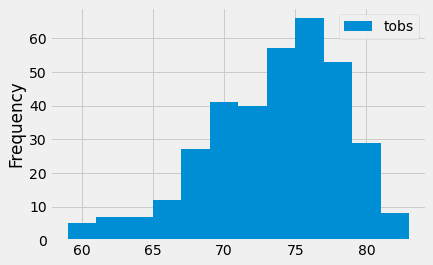

In [69]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query = f'''
SELECT
date,
tobs
FROM
measurement
WHERE
date >= (SELECT DATE(MAX(date),'-1 year')FROM  measurement)
AND station = '{most_active_station}'
'''
temps_obs_df = pd.read_sql(query, conn)
temps_obs_df.plot.hist(bins = 12)

## Part 3 - Data Analysis Assignment

In [74]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    # your code here
    query = f'''
SELECT
MIN(tobs) AS min_tobs,
MAX(tobs) AS max_tobs,
AVG(tobs) AS avg_tbs
FROM
measurement
WHERE
date BETWEEN '{start_date}' AND '{end_date}'
'''
    temp_stats = pd.read_sql(query, conn)
    
    temp_stats = tuple(temp_stats.values[0])
    
    return temp_stats

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

(62.0, 74.0, 69.57142857142857)


In [14]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [15]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [16]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [17]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A DataFrame containing the daily normals, tmin, tavg, and tmax
    
    """
    
    # your code here
    
    return # your code here
    
daily_normals("01-01")

In [18]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [19]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [20]:
# Plot the daily normals as an area plot with `stacked=False`
